<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Subreddit Classification

## Table of Contents
1. [Problem Statement](#1.-Problem-Statement)  
2. [Import Libraries and Datasets](#2.-Import-Libraries-and-Datasets)   
3. [Preprocessing](#3.-Preprocessing)  
4. [Modelling (Bag-of-Words + Machine Learning)](#4.-Modelling-(Bag-of-Words-+-Machine-Learning))  
5. [Conclusion and Recommendation](#5.-Conclusion-and-Recommendation)  
6. [Limitations](#6.-Limitations)
7. [Future Steps](#7.-Future-Steps)

# 1. Problem Statement

We, as volunteers, are helping the Singapore Sleep Society in their goal of raising public awareness about healthy sleep habits on World Sleep Day 2023. As part of our efforts, we plan to **develop a web application that can assist individuals in identifying potential sleep disorders based on their reported sleep experiences**. Specifically, we will focus on two disorders: *Sleep Apnea*, characterized by breathing interruptions during sleep, and *Sleep Paralysis*, which involves temporary paralysis upon waking up.

To build the application, we will use natural language processing (NLP) techniques to analyze text data from two subreddits: 'SleepApnea' and 'Sleepparalysis'. Our approach will involve **identifying key words and phrases in users' experiences** and **building a robust classification model that can accurately predict the likelihood of an individual having either Sleep Apnea or Sleep Paralysis**. This application will provide users with valuable insights into their sleep patterns and enable them to seek medical advice if necessary.

# 2. Import Libraries and Datasets

In [1]:
import warnings
warnings.filterwarnings("ignore")
from nlp_utils import *

In [2]:
dtf = pd.read_csv("../data/data_cleaned.csv")

In [3]:
dtf.head()

subreddit                                           selftext  \
0  SleepApnea  I've been using APAP for years, but there's so...   
1  SleepApnea  So my question is simple do you clean your mas...   
2  SleepApnea  If so, what’s it like? I’m thinking of doing t...   
3  SleepApnea  Just earlier today I found out I had an AHI of...   
4  SleepApnea  It’s been a long long journey. Based in the UK...   

                                               title  \
0                          Why Does My APAP Do This?   
1        Cleaning the Mask with Filtered Tap Water ?   
2  Does anyone here use a Mandibular Advancement ...   
3         Diagnosed with mild sleep apnea, what now?   
4        Finally got CPAP after 2 years of waiting 🎉   

                                      selftext_clean  \
0  using apap something bugging resmed 10 autoset...   
1  question simple clean mask aswell distilled wa...   
2                   whats mouth guard v cpap machine   
3  earlier today found ahi 13 per enough diagnose...   
4  long long journey based uk everything thankful...   

                                         title_clean  \
0                                           doe apap   
1                   cleaning mask filtered tap water   
2  doe anyone use mandibular advancement devicemo...   
3                                     diagnosed mild   
4                         finally got cpap 2 waiting   

                                      selftext_title  \
0  I've been using APAP for years, but there's so...   
1  So my question is simple do you clean your mas...   
2  If so, what’s it like? I’m thinking of doing t...   
3  Just earlier today I found out I had an AHI of...   
4  It’s been a long long journey. Based in the UK...   

                                selftext_title_clean  word_count  char_count  \
0  using apap something bugging resmed 10 autoset...          77         443   
1  question simple clean mask aswell distilled wa...          50         261   
2  whats mouth guard v cpap machine doe anyone us...          13          76   
3  earlier today found ahi 13 per enough diagnose...         166         921   
4  long long journey based uk everything thankful...          58         317   

   avg_word_length  
0         5.753247  
1         5.220000  
2         5.846154  
3         5.548193  
4         5.465517

# 3. Preprocessing

## 3.1 Encode Target

**Encode two subreddits as below:**
- SleepApnea: 1 
- Sleepparalysis: 0

In [4]:
# Set 'SleepApnea' as 1, 'Sleepparalysis' as 0
dtf['subreddit'] = dtf['subreddit'].map({'SleepApnea':1, 'Sleepparalysis':0})

## 3.2 Partitioning (Train/Test Split)

In [5]:
dtf_train, dtf_test = model_selection.train_test_split(dtf[['subreddit','selftext_title', 'selftext_title_clean']], test_size=0.3, random_state=101) 

In [6]:
y_train = dtf_train["subreddit"].values
y_test = dtf_test["subreddit"].values

# 4. Modelling (Bag-of-Words + Machine Learning)

We will be using two different vectorizers, namely the **CountVectorizer** and **TfidfVectorizer**, along with two classifiers, **Naive Bayes** and **Logistic Regression**, to determine the best combination for our final production model. 

CountVectorizer converts a collection of text documents to a matrix of token counts, where each row represents a document and each column represents a unique word in the corpus. Conversely, TfidfVectorizer takes into account not only the frequency of words in the document but also the inverse document frequency, which penalizes words that appear in many documents and are therefore less informative. 

Naive Bayes is a probabilistic model that makes predictions based on the probability of a document belonging to a certain class, given its features (words in this case). Naive Bayes assumes that all features are independent of each other, hence the name "naive". In contrast, Logistic Regression models the probability of a document belonging to a certain class using a logistic function. It's a simple and interpretable algorithm that can be easily implemented and understood. 

Ultimately, selecting the best performing model requires the appropriate evaluation of different models using relevant metrics such as accuracy, precision, recall, and F1 score. And we will checkout the explainability of each model as well before we have the final conclusion.  

**For each vectorizer + classifier, we will conduct the following process:**
- Features engineering with vectorizer
- Select classifier
- Train / Test
- Evaluation
- Explainability

**Baseline score:**

The baseline score to beat to prove that the production model is better than null model is to assume that all records are from SleepApnea (label: 1) whereby the actual SleepApnea records account for 54.34% in test data.

In [7]:
# Null/baseline model score
dtf_test['subreddit'].value_counts(normalize=True)

1    0.54343
0    0.45657
Name: subreddit, dtype: float64

## 4.1 Count (classic BoW) + Naive Bayes

### 4.1.1 Features Engineering

In [8]:
# Count (classic BoW)
vectorizer = feature_extraction.text.CountVectorizer(max_features=1000, ngram_range=(1,2))

# Tf-Idf (advanced variant of BoW)
#vectorizer = feature_extraction.text.TfidfVectorizer(max_features=1000, ngram_range=(1,2))

--- creating sparse matrix ---
shape: (2093, 1000)
--- creating vocabulary ---
1000 words
--- tokenization ---
2093 texts


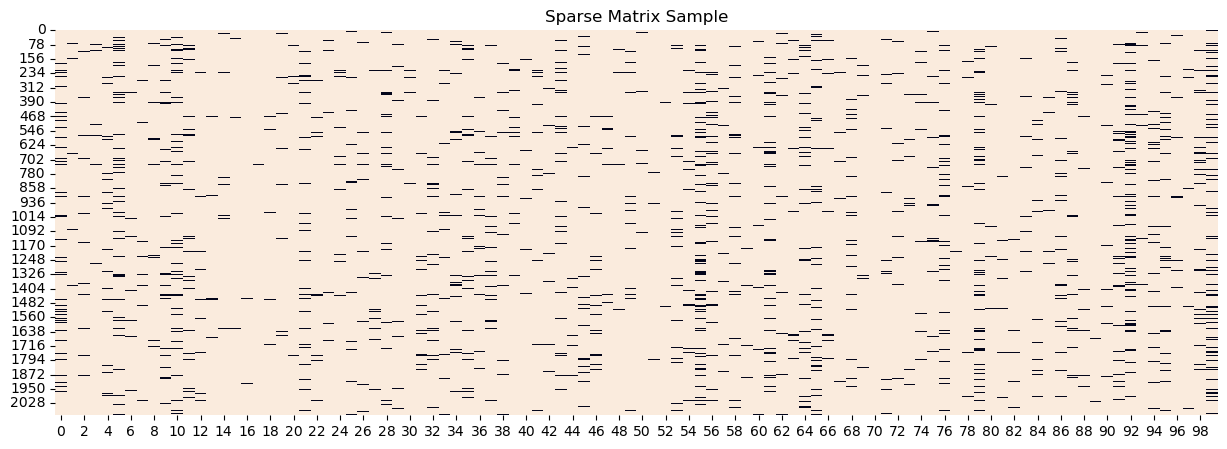

In [9]:
# Vectorize corpus with Bag-of-Words
dic_bow = fit_bow(corpus=dtf_train["selftext_title_clean"], vectorizer=vectorizer, vocabulary=None)

In [10]:
X_train, X_names, vectorizer, dic_vocabulary, lst_text2tokens = dic_bow["X"], dic_bow["X_names"], dic_bow["vectorizer"], dic_bow["dic_vocabulary"], dic_bow["lst_text2tokens"]

In [11]:
# check some features in the first text as an example
f_range = (80, 85)

print("fetures name (from dic_vocabulary):")
print({k:v for k,v in sorted(dic_vocabulary.items(), key=lambda item:item[1], reverse=False)
      if v in np.arange(f_range[0], f_range[1]+1, step=1)})

print("")
print("value of these features (in the sparse matrix) for the first text:")
print(vectorizer.get_feature_names()[f_range[0]:f_range[1]])
print(X_train[0, f_range[0]:f_range[1]].todense())

fetures name (from dic_vocabulary):
{'awake': 80, 'awakening': 81, 'aware': 82, 'away': 83, 'awful': 84, 'back': 85}

value of these features (in the sparse matrix) for the first text:
['awake', 'awakening', 'aware', 'away', 'awful']
[[2 0 0 0 0]]


In [12]:
# check the text conversion in the first text as an example
i = 0

## list of text: ["I like this", ...]
len_txt = len(dtf_train["selftext_title_clean"].iloc[i].split())
print("from: ", dtf_train["selftext_title_clean"].iloc[i], "| len:", len_txt)

## list of token ids: [[1, 2, 3], ...]
len_tokens = len(lst_text2tokens[i])
print("to: ", lst_text2tokens[i], "| len:", len(lst_text2tokens[i]))

## vocabulary: {"I":1, "like":2, "this":3, ...}
print("check: ", dtf_train["selftext_title_clean"].iloc[i].split()[0], " -- idx in vocabulary -->", 
      dic_vocabulary[dtf_train["selftext_title_clean"].iloc[i].split()[0]])

## words not in vocabulary?
if len_txt-len_tokens != 0:
    missing_words = [word for word in dtf_train["selftext_title_clean"].iloc[i].split() if word not in dic_vocabulary.keys()]
    print("!!!", len_txt-len_tokens, "words not in vocabulary:", missing_words)

from:  ever since first episode 5 one first sign intense shock brain sometimes shoot spine first even state yet half conscious half type state learned manage throughout force awake every last minute trying fight awake one zap almost never ending wake completely anyone intense sometimes painful electricalstatic pressure brain | len: 48
to:  [278, 777, 316, 270, 611, 316, 776, 457, 115, 796, 316, 273, 815, 996, 377, 173, 377, 916, 815, 482, 529, 877, 327, 80, 280, 473, 552, 905, 308, 80, 611, 35, 583, 938, 168, 52, 457, 796, 629, 669, 115] | len: 41
check:  ever  -- idx in vocabulary --> 278
!!! 7 words not in vocabulary: ['5', 'shock', 'shoot', 'spine', 'zap', 'ending', 'electricalstatic']


### 4.1.2 Select Classifier

In [13]:
classifier = naive_bayes.MultinomialNB()

### 4.1.3 Train / Test

In [14]:
# Take the text from X_test 
X_test = dtf_test["selftext_title_clean"].values

In [15]:
# Transformed/predicted by the pipeline
model, predicted_prob, predicted = fit_classif(X_train, y_train, X_test, vectorizer, classifier)

In [16]:
# Backup the model
model_1 = model

### 4.1.4 Evaluation

Accuracy: 0.9688
Auc: 0.9949
Detail:
              precision    recall  f1-score   support

           0     0.9704    0.9610    0.9657       410
           1     0.9675    0.9754    0.9714       488

    accuracy                         0.9688       898
   macro avg     0.9690    0.9682    0.9686       898
weighted avg     0.9688    0.9688    0.9688       898



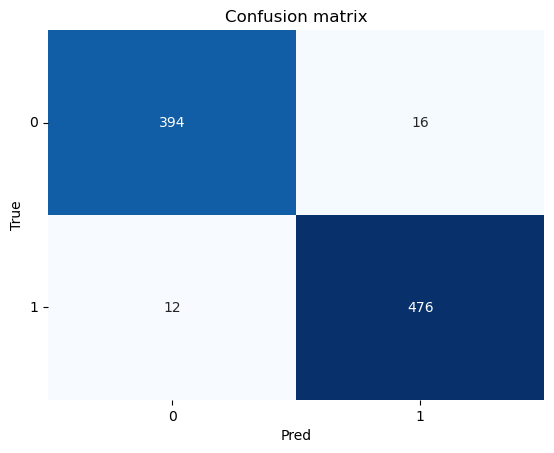

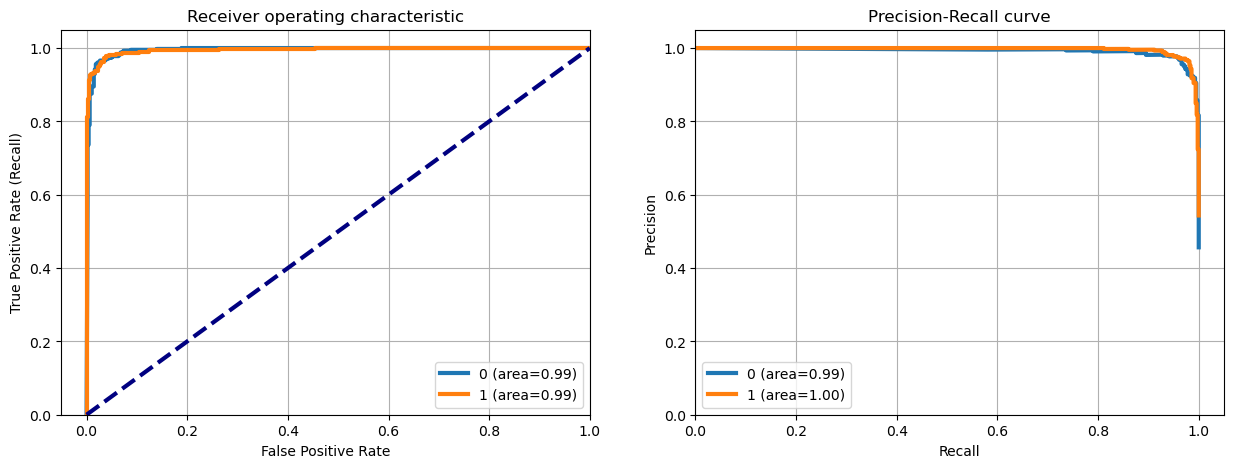

In [17]:
# Print out all the classification metrics
evaluate_classif(y_test, predicted, predicted_prob, figsize=(15,5))

### 4.1.5 Explainability

In [18]:
# Find all the wrong predictions 
for i in range(0,898):
    if y_test[i] != predicted[i]:
        print(f"{i}")
        print("True:", y_test[i], "--> Pred:", predicted[i], "| Prob:", round(np.max(predicted_prob[i]),2))

107
True: 1 --> Pred: 0 | Prob: 1.0
115
True: 0 --> Pred: 1 | Prob: 0.91
118
True: 0 --> Pred: 1 | Prob: 1.0
120
True: 0 --> Pred: 1 | Prob: 0.87
155
True: 0 --> Pred: 1 | Prob: 0.97
162
True: 0 --> Pred: 1 | Prob: 0.54
261
True: 1 --> Pred: 0 | Prob: 0.74
358
True: 1 --> Pred: 0 | Prob: 1.0
392
True: 0 --> Pred: 1 | Prob: 1.0
466
True: 0 --> Pred: 1 | Prob: 0.79
513
True: 1 --> Pred: 0 | Prob: 1.0
570
True: 1 --> Pred: 0 | Prob: 1.0
577
True: 0 --> Pred: 1 | Prob: 0.99
583
True: 1 --> Pred: 0 | Prob: 1.0
599
True: 0 --> Pred: 1 | Prob: 1.0
624
True: 1 --> Pred: 0 | Prob: 0.55
637
True: 1 --> Pred: 0 | Prob: 0.67
645
True: 1 --> Pred: 0 | Prob: 1.0
673
True: 0 --> Pred: 1 | Prob: 0.97
695
True: 1 --> Pred: 0 | Prob: 0.94
699
True: 0 --> Pred: 1 | Prob: 0.93
744
True: 1 --> Pred: 0 | Prob: 1.0
775
True: 0 --> Pred: 1 | Prob: 1.0
797
True: 0 --> Pred: 1 | Prob: 0.99
820
True: 0 --> Pred: 1 | Prob: 0.74
825
True: 0 --> Pred: 1 | Prob: 0.59
859
True: 1 --> Pred: 0 | Prob: 0.84
897
True: 0 

In [19]:
# Take an example (i=107), use lime to further understand why it was predicted wrongly
i = 107
print("True:", y_test[i], "--> Pred:", predicted[i], "| Prob:", round(np.max(predicted_prob[i]),2))
print(" ")
exp = explainer_lime(model, y_train, txt_instance=dtf_test["selftext_title"].iloc[i], top=3)

True: 1 --> Pred: 0 | Prob: 1.0
 


***Interpretation: The model predicted "Sleep Paralysis" (label: 0) with a probability of 1.0. The LIME explainer shows that the keyword "test" is essential for predicting "Sleep Apnea" (label: 1) correctly. However, the document also contains the words "woke" and "staring", which are weighted to classify the document as "Sleep Paralysis". If we remove these words, we can expect the model to predict "Sleep Paralysis" with a lower probability of 0.67 (1.0 - 0.17 - 0.16).***   

## 4.2 Tf-Idf (advanced variant of BoW) + Naive Bayes

### 4.2.1 Features Engineering

In [20]:
# Count (classic BoW)
#vectorizer = feature_extraction.text.CountVectorizer(max_features=1000, ngram_range=(1,2))

# Tf-Idf (advanced variant of BoW)
vectorizer = feature_extraction.text.TfidfVectorizer(max_features=1000, ngram_range=(1,2))

--- creating sparse matrix ---
shape: (2093, 1000)
--- creating vocabulary ---
1000 words
--- tokenization ---
2093 texts


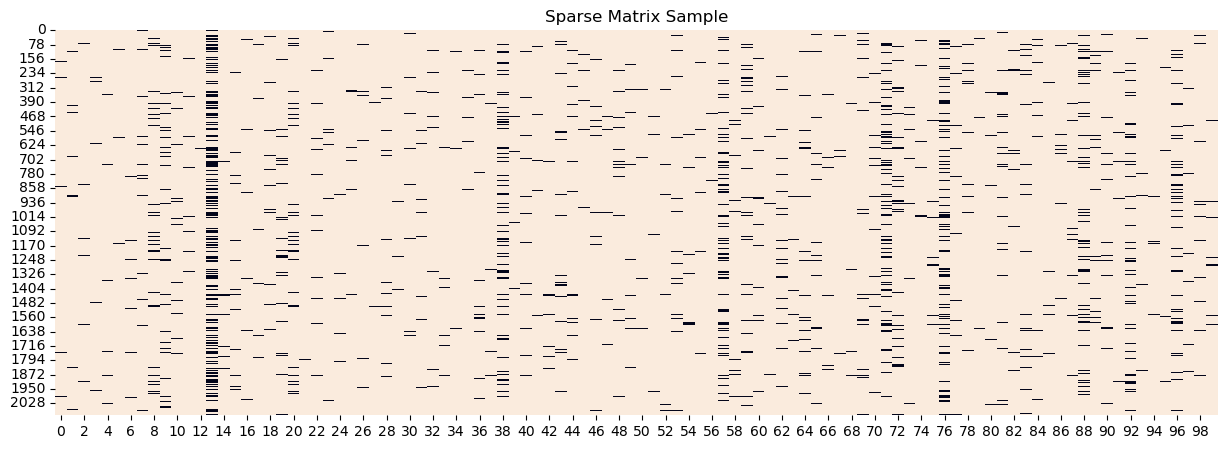

In [21]:
# Vectorize corpus with Bag-of-Words
dic_bow = fit_bow(corpus=dtf_train["selftext_title_clean"], vectorizer=vectorizer, vocabulary=None)

In [22]:
X_train, X_names, vectorizer, dic_vocabulary, lst_text2tokens = dic_bow["X"], dic_bow["X_names"], dic_bow["vectorizer"], dic_bow["dic_vocabulary"], dic_bow["lst_text2tokens"]

In [23]:
# check some features in the first text as an example
f_range = (80, 85)

print("fetures name (from dic_vocabulary):")
print({k:v for k,v in sorted(dic_vocabulary.items(), key=lambda item:item[1], reverse=False)
      if v in np.arange(f_range[0], f_range[1]+1, step=1)})

print("")
print("value of these features (in the sparse matrix) for the first text:")
print(vectorizer.get_feature_names()[f_range[0]:f_range[1]])
print(X_train[0, f_range[0]:f_range[1]].todense())

fetures name (from dic_vocabulary):
{'awake': 80, 'awakening': 81, 'aware': 82, 'away': 83, 'awful': 84, 'back': 85}

value of these features (in the sparse matrix) for the first text:
['awake', 'awakening', 'aware', 'away', 'awful']
[[0.21324759 0.         0.         0.         0.        ]]


In [24]:
# check the text conversion in the first text as an example
i = 0

## list of text: ["I like this", ...]
len_txt = len(dtf_train["selftext_title_clean"].iloc[i].split())
print("from: ", dtf_train["selftext_title_clean"].iloc[i], "| len:", len_txt)

## list of token ids: [[1, 2, 3], ...]
len_tokens = len(lst_text2tokens[i])
print("to: ", lst_text2tokens[i], "| len:", len(lst_text2tokens[i]))

## vocabulary: {"I":1, "like":2, "this":3, ...}
print("check: ", dtf_train["selftext_title_clean"].iloc[i].split()[0], " -- idx in vocabulary -->", 
      dic_vocabulary[dtf_train["selftext_title_clean"].iloc[i].split()[0]])

## words not in vocabulary?
if len_txt-len_tokens != 0:
    missing_words = [word for word in dtf_train["selftext_title_clean"].iloc[i].split() if word not in dic_vocabulary.keys()]
    print("!!!", len_txt-len_tokens, "words not in vocabulary:", missing_words)

from:  ever since first episode 5 one first sign intense shock brain sometimes shoot spine first even state yet half conscious half type state learned manage throughout force awake every last minute trying fight awake one zap almost never ending wake completely anyone intense sometimes painful electricalstatic pressure brain | len: 48
to:  [278, 777, 316, 270, 611, 316, 776, 457, 115, 796, 316, 273, 815, 996, 377, 173, 377, 916, 815, 482, 529, 877, 327, 80, 280, 473, 552, 905, 308, 80, 611, 35, 583, 938, 168, 52, 457, 796, 629, 669, 115] | len: 41
check:  ever  -- idx in vocabulary --> 278
!!! 7 words not in vocabulary: ['5', 'shock', 'shoot', 'spine', 'zap', 'ending', 'electricalstatic']


### 4.2.2 Select Classifier

In [25]:
classifier = naive_bayes.MultinomialNB()

### 4.2.3 Train / Test

In [26]:
# Take the text from X_test 
X_test = dtf_test["selftext_title_clean"].values

In [27]:
# Transformed/predicted by the pipeline
model, predicted_prob, predicted = fit_classif(X_train, y_train, X_test, vectorizer, classifier)

In [28]:
# Backup the model
model_2 = model

### 4.2.4 Evaluation

Accuracy: 0.9666
Auc: 0.9949
Detail:
              precision    recall  f1-score   support

           0     0.9657    0.9610    0.9633       410
           1     0.9673    0.9713    0.9693       488

    accuracy                         0.9666       898
   macro avg     0.9665    0.9661    0.9663       898
weighted avg     0.9666    0.9666    0.9666       898



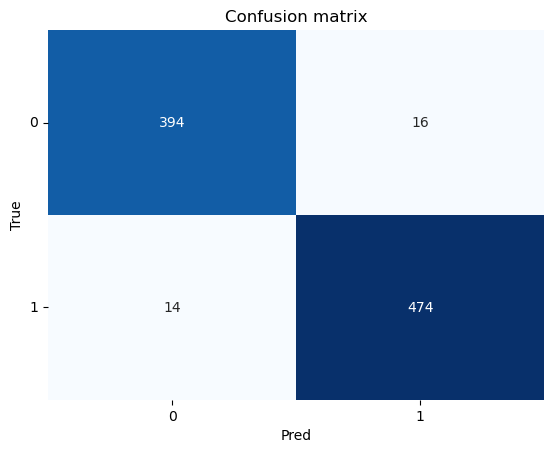

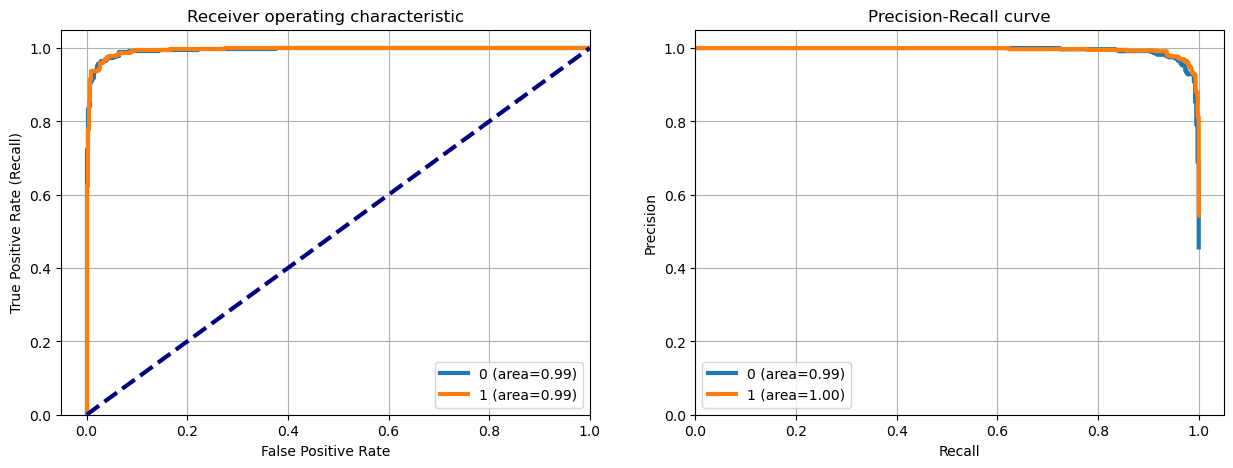

In [29]:
# Print out all the classification metrics
evaluate_classif(y_test, predicted, predicted_prob, figsize=(15,5))

### 4.2.5 Explainability

In [30]:
# Find all the wrong predictions 
for i in range(0,898):
    if y_test[i] != predicted[i]:
        print(f"{i}")
        print("True:", y_test[i], "--> Pred:", predicted[i], "| Prob:", round(np.max(predicted_prob[i]),2))

101
True: 1 --> Pred: 0 | Prob: 0.52
107
True: 1 --> Pred: 0 | Prob: 0.86
115
True: 0 --> Pred: 1 | Prob: 0.55
118
True: 0 --> Pred: 1 | Prob: 0.72
120
True: 0 --> Pred: 1 | Prob: 0.52
143
True: 1 --> Pred: 0 | Prob: 0.51
155
True: 0 --> Pred: 1 | Prob: 0.67
244
True: 1 --> Pred: 0 | Prob: 0.54
261
True: 1 --> Pred: 0 | Prob: 0.61
358
True: 1 --> Pred: 0 | Prob: 0.76
392
True: 0 --> Pred: 1 | Prob: 0.96
466
True: 0 --> Pred: 1 | Prob: 0.53
513
True: 1 --> Pred: 0 | Prob: 0.73
570
True: 1 --> Pred: 0 | Prob: 0.93
577
True: 0 --> Pred: 1 | Prob: 0.63
583
True: 1 --> Pred: 0 | Prob: 0.75
599
True: 0 --> Pred: 1 | Prob: 0.83
637
True: 1 --> Pred: 0 | Prob: 0.52
645
True: 1 --> Pred: 0 | Prob: 0.85
673
True: 0 --> Pred: 1 | Prob: 0.62
695
True: 1 --> Pred: 0 | Prob: 0.58
699
True: 0 --> Pred: 1 | Prob: 0.66
744
True: 1 --> Pred: 0 | Prob: 0.73
775
True: 0 --> Pred: 1 | Prob: 0.67
797
True: 0 --> Pred: 1 | Prob: 0.66
804
True: 0 --> Pred: 1 | Prob: 0.5
818
True: 0 --> Pred: 1 | Prob: 0.56
82

In [31]:
# Take an example (i=107), use lime to further understand why it was predicted wrongly
i = 107
print("True:", y_test[i], "--> Pred:", predicted[i], "| Prob:", round(np.max(predicted_prob[i]),2))
print(" ")
exp = explainer_lime(model, y_train, txt_instance=dtf_test["selftext_title"].iloc[i], top=3)

True: 1 --> Pred: 0 | Prob: 0.86
 


***Interpretation: The model predicted "Sleep Paralysis" (label: 0) with a probability of 0.86, which is lower than the prediction using CountVectorizer. The LIME explainer shows that the keyword "test" is crucial in predicting "Sleep Apnea" (label: 1) accurately. However, the document contains the words "staring" and "back", which contribute to classifying the document as "Sleep Paralysis". If we remove these words, we can expect the model to predict "Sleep Paralysis" with a lower probability of 0.62 (0.86 - 0.12 - 0.12).***  

## 4.3 Count (classic BoW) + Logistic Regression

### 4.3.1 Features Engineering

In [32]:
# Count (classic BoW)
vectorizer = feature_extraction.text.CountVectorizer(max_features=1000, ngram_range=(1,2))

# Tf-Idf (advanced variant of BoW)
#vectorizer = feature_extraction.text.TfidfVectorizer(max_features=1000, ngram_range=(1,2))

--- creating sparse matrix ---
shape: (2093, 1000)
--- creating vocabulary ---
1000 words
--- tokenization ---
2093 texts


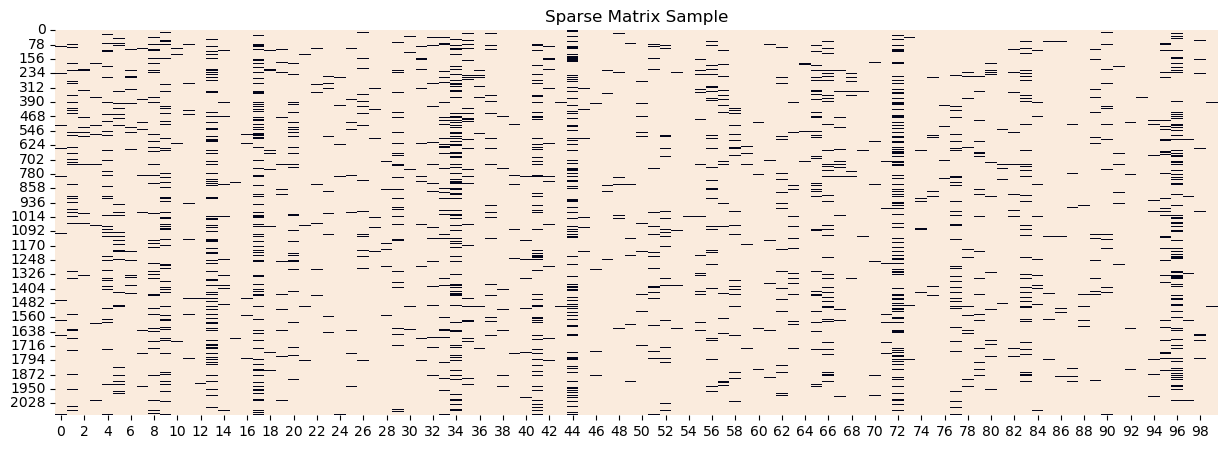

In [33]:
# Vectorize corpus with Bag-of-Words
dic_bow = fit_bow(corpus=dtf_train["selftext_title_clean"], vectorizer=vectorizer, vocabulary=None)

In [34]:
X_train, X_names, vectorizer, dic_vocabulary, lst_text2tokens = dic_bow["X"], dic_bow["X_names"], dic_bow["vectorizer"], dic_bow["dic_vocabulary"], dic_bow["lst_text2tokens"]

### 4.3.2 Select Classifier

In [35]:
classifier = linear_model.LogisticRegression()

### 4.3.3 Train / Test

In [36]:
# Take the text from X_test 
X_test = dtf_test["selftext_title_clean"].values

In [37]:
# Transformed/predicted by the pipeline
model, predicted_prob, predicted = fit_classif(X_train, y_train, X_test, vectorizer, classifier)

In [38]:
# Backup the model
model_3 = model

### 4.3.4 Evaluation

Accuracy: 0.961
Auc: 0.9937
Detail:
              precision    recall  f1-score   support

           0     0.9562    0.9585    0.9574       410
           1     0.9651    0.9631    0.9641       488

    accuracy                         0.9610       898
   macro avg     0.9606    0.9608    0.9607       898
weighted avg     0.9610    0.9610    0.9610       898



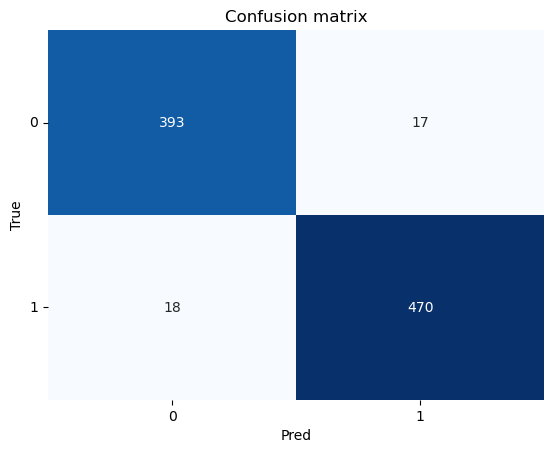

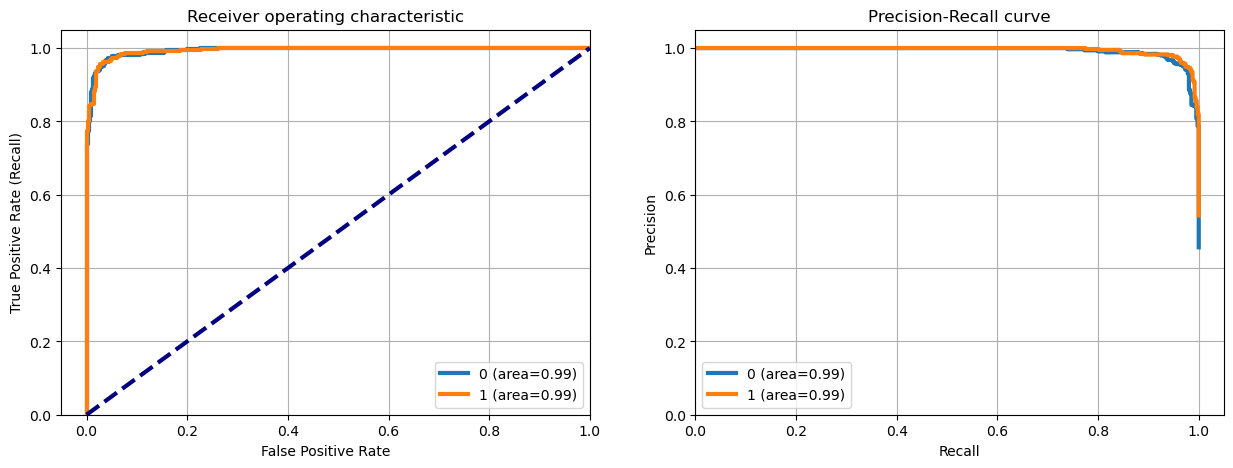

In [39]:
# Print out all the classification metrics
evaluate_classif(y_test, predicted, predicted_prob, figsize=(15,5))

### 4.3.5 Explainability

In [40]:
# Find all the wrong predictions 
for i in range(0,898):
    if y_test[i] != predicted[i]:
        print(f"{i}")
        print("True:", y_test[i], "--> Pred:", predicted[i], "| Prob:", round(np.max(predicted_prob[i]),2))

8
True: 0 --> Pred: 1 | Prob: 0.9
75
True: 1 --> Pred: 0 | Prob: 0.54
107
True: 1 --> Pred: 0 | Prob: 0.95
118
True: 0 --> Pred: 1 | Prob: 0.61
143
True: 1 --> Pred: 0 | Prob: 0.97
195
True: 0 --> Pred: 1 | Prob: 0.54
244
True: 1 --> Pred: 0 | Prob: 0.64
260
True: 0 --> Pred: 1 | Prob: 0.54
261
True: 1 --> Pred: 0 | Prob: 0.83
277
True: 1 --> Pred: 0 | Prob: 0.56
294
True: 1 --> Pred: 0 | Prob: 0.63
307
True: 1 --> Pred: 0 | Prob: 0.54
323
True: 1 --> Pred: 0 | Prob: 0.68
348
True: 1 --> Pred: 0 | Prob: 0.52
358
True: 1 --> Pred: 0 | Prob: 0.98
359
True: 1 --> Pred: 0 | Prob: 0.63
392
True: 0 --> Pred: 1 | Prob: 0.9
466
True: 0 --> Pred: 1 | Prob: 0.94
487
True: 0 --> Pred: 1 | Prob: 0.53
529
True: 0 --> Pred: 1 | Prob: 0.53
570
True: 1 --> Pred: 0 | Prob: 0.82
577
True: 0 --> Pred: 1 | Prob: 0.91
599
True: 0 --> Pred: 1 | Prob: 0.5
637
True: 1 --> Pred: 0 | Prob: 0.59
645
True: 1 --> Pred: 0 | Prob: 0.66
668
True: 0 --> Pred: 1 | Prob: 0.96
699
True: 0 --> Pred: 1 | Prob: 0.86
744
Tru

In [41]:
# Take an example (i=107), use lime to further understand why it was predicted wrongly
i = 107
print("True:", y_test[i], "--> Pred:", predicted[i], "| Prob:", round(np.max(predicted_prob[i]),2))
print(" ")
exp = explainer_lime(model, y_train, txt_instance=dtf_test["selftext_title"].iloc[i], top=3)

True: 1 --> Pred: 0 | Prob: 0.95
 


***Interpretation: The model predicted "Sleep Paralysis" (label: 0) with a high probability of 0.95. In contrast to the CountVectorizer + Naive Bayes model, the words "move" and "woke" are significant features that assist in classifying the document as "Sleep Paralysis". If we remove these words, we can expect the model to predict "Sleep Paralysis" with a much lower probability of 0.29 (0.95 - 0.38 - 0.28), which indicates that the document could actually be classified as "Sleep Apnea" correctly with a probability of 0.71 (1-0.29).***   

In [42]:
# use logistic regression coefficient to interpret 
word_list = ['test', 'move', 'woke']

for word in word_list:
    word_index = dic_vocabulary[word]
    word_coef = classifier.coef_[0][word_index]
    word_odds_ratio = np.exp(word_coef)
    print(f"{word}, coefficient: {word_coef}, odds ratio: {word_odds_ratio}")

test, coefficient: 0.9220861539945241, odds ratio: 2.5145306201698276
move, coefficient: -1.5986787511452314, odds ratio: 0.2021634498407037
woke, coefficient: -0.6134523774016035, odds ratio: 0.5414782511648052


***Interpretation: An increase of one count for the word 'test' is associated with a 2.51-fold increase in the odds of 'Sleep Apnea', holding all other variables constant in the model. Conversely, an increase of one count for the words 'move' and 'woke' is associated with a 0.20-fold and 0.54-fold decrease in the odds of 'Sleep Apnea', respectively, holding all other variables constant in the model.***

## 4.4 Tf-Idf (advanced variant of BoW) + Logistic Regression

### 4.4.1 Features Engineering

In [43]:
# Count (classic BoW)
#vectorizer = feature_extraction.text.CountVectorizer(max_features=1000, ngram_range=(1,2))

# Tf-Idf (advanced variant of BoW)
vectorizer = feature_extraction.text.TfidfVectorizer(max_features=1000, ngram_range=(1,2))

--- creating sparse matrix ---
shape: (2093, 1000)
--- creating vocabulary ---
1000 words
--- tokenization ---
2093 texts


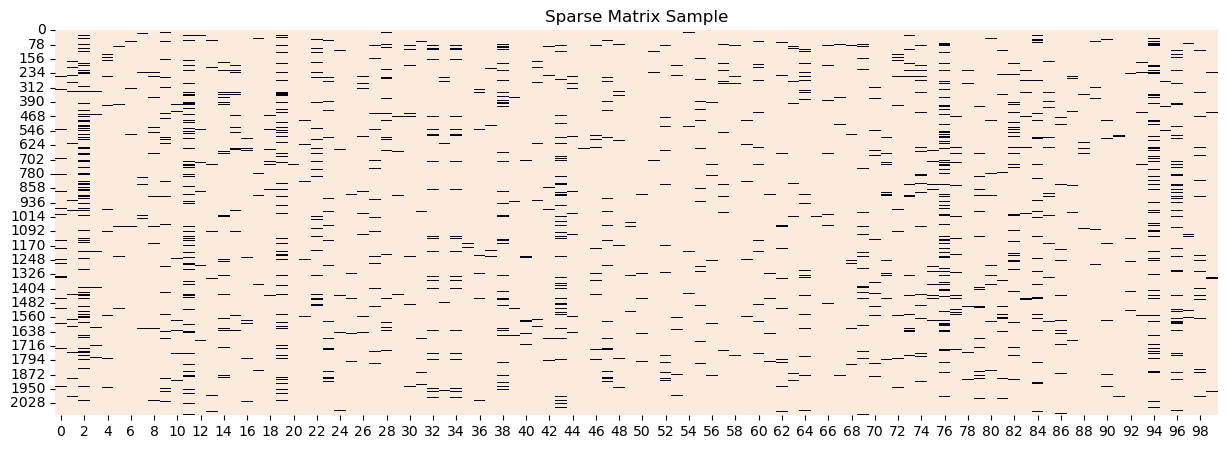

In [44]:
# Vectorize corpus with Bag-of-Words
dic_bow = fit_bow(corpus=dtf_train["selftext_title_clean"], vectorizer=vectorizer, vocabulary=None)

In [45]:
X_train, X_names, vectorizer, dic_vocabulary, lst_text2tokens = dic_bow["X"], dic_bow["X_names"], dic_bow["vectorizer"], dic_bow["dic_vocabulary"], dic_bow["lst_text2tokens"]

### 4.4.2 Select Classifier

In [46]:
classifier = linear_model.LogisticRegression()

### 4.4.3 Train / Test

In [47]:
# Take the text from X_test 
X_test = dtf_test["selftext_title_clean"].values

In [48]:
# Transformed/predicted by the pipeline
model, predicted_prob, predicted = fit_classif(X_train, y_train, X_test, vectorizer, classifier)

In [49]:
# Backup the model
model_4 = model

### 4.4.4 Evaluation

Accuracy: 0.9699
Auc: 0.9946
Detail:
              precision    recall  f1-score   support

           0     0.9728    0.9610    0.9669       410
           1     0.9675    0.9775    0.9725       488

    accuracy                         0.9699       898
   macro avg     0.9702    0.9692    0.9697       898
weighted avg     0.9700    0.9699    0.9699       898



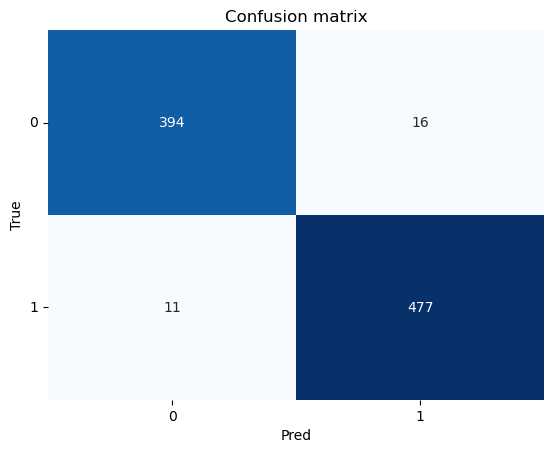

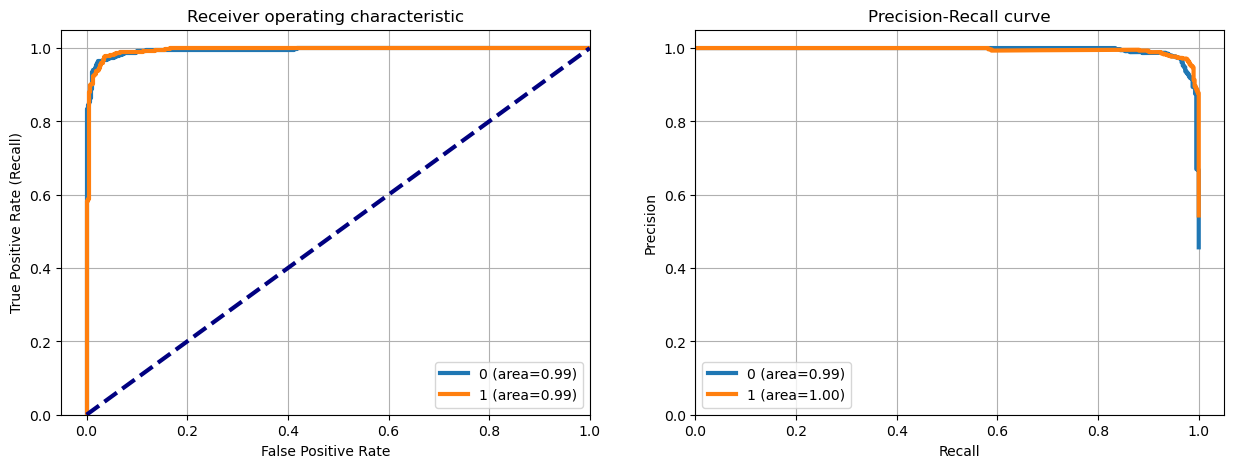

In [50]:
# Print out all the classification metrics
evaluate_classif(y_test, predicted, predicted_prob, figsize=(15,5))

### 4.4.5 Explainability

In [51]:
# Find all the wrong predictions 
for i in range(0,898):
    if y_test[i] != predicted[i]:
        print(f"{i}")
        print("True:", y_test[i], "--> Pred:", predicted[i], "| Prob:", round(np.max(predicted_prob[i]),2))

8
True: 0 --> Pred: 1 | Prob: 0.53
107
True: 1 --> Pred: 0 | Prob: 0.71
118
True: 0 --> Pred: 1 | Prob: 0.6
143
True: 1 --> Pred: 0 | Prob: 0.56
155
True: 0 --> Pred: 1 | Prob: 0.6
209
True: 1 --> Pred: 0 | Prob: 0.51
261
True: 1 --> Pred: 0 | Prob: 0.6
358
True: 1 --> Pred: 0 | Prob: 0.74
380
True: 1 --> Pred: 0 | Prob: 0.51
392
True: 0 --> Pred: 1 | Prob: 0.89
466
True: 0 --> Pred: 1 | Prob: 0.56
529
True: 0 --> Pred: 1 | Prob: 0.5
570
True: 1 --> Pred: 0 | Prob: 0.7
577
True: 0 --> Pred: 1 | Prob: 0.61
583
True: 1 --> Pred: 0 | Prob: 0.57
599
True: 0 --> Pred: 1 | Prob: 0.66
637
True: 1 --> Pred: 0 | Prob: 0.54
645
True: 1 --> Pred: 0 | Prob: 0.72
668
True: 0 --> Pred: 1 | Prob: 0.63
673
True: 0 --> Pred: 1 | Prob: 0.56
699
True: 0 --> Pred: 1 | Prob: 0.64
744
True: 1 --> Pred: 0 | Prob: 0.68
775
True: 0 --> Pred: 1 | Prob: 0.71
804
True: 0 --> Pred: 1 | Prob: 0.6
818
True: 0 --> Pred: 1 | Prob: 0.51
820
True: 0 --> Pred: 1 | Prob: 0.68
897
True: 0 --> Pred: 1 | Prob: 0.89


In [52]:
# Take an example (i=107), use lime to further understand why it was predicted wrongly
i = 107
print("True:", y_test[i], "--> Pred:", predicted[i], "| Prob:", round(np.max(predicted_prob[i]),2))
print(" ")
exp = explainer_lime(model, y_train, txt_instance=dtf_test["selftext_title"].iloc[i], top=3)

True: 1 --> Pred: 0 | Prob: 0.71
 


***Interpretation: The model predicted "Sleep Paralysis" (label: 0) with a probability of 0.71, which is lower than the prediction using CountVectorizer + Logistic Regression. However, like the previous model, the words "woke" and "move" remain crucial features in classifying the document as "Sleep Paralysis". If we remove these words, we can expect the model to predict "Sleep Paralysis" with a lower probability of 0.48 (0.71 - 0.12 - 0.11), which suggests that the document could actually be classified as "Sleep Apnea" correctly with a probability of 0.52 (1-0.48).***   

In [53]:
# use logistic regression coefficient to interpret 
word_list = ['test', 'move', 'woke']

for word in word_list:
    word_index = dic_vocabulary[word]
    word_coef = classifier.coef_[0][word_index]
    word_odds_ratio = np.exp(word_coef)
    print(f"{word}, coefficient: {word_coef}, odds ratio: {word_odds_ratio}")

test, coefficient: 2.1650754744561547, odds ratio: 8.715259671513046
move, coefficient: -3.2675482022141753, odds ratio: 0.038099725476594196
woke, coefficient: -1.7378027072134685, odds ratio: 0.17590649435231004


***Interpretation: An increase of one unit for the word 'test' is associated with a 8.72-fold increase in the odds of 'Sleep Apnea', which is higher than the prediction using CountVectorizer + Logistic Regression, holding all other variables constant in the model. Conversely, an increase of one unit for the words 'move' and 'woke' is associated with a 0.04-fold and 0.18-fold decrease in the odds of 'Sleep Apnea', respectively, which is lower than the prediction using CountVectorizer + Logistic Regression, holding all other variables constant in the model. This probably explained why the model predicted 'Sleep Apnea' with a probability higher (0.29 vs. 0.05), than the prediction using CountVectorizer + Logistic Regression.***

## 4.5 Summary of Models Performance

||Count + Naive Bayes|Tfidf + Naive Bayes|Count + Logistic Regression|Tfidf + Logistic Regression|
|:---:|:---:|:---:|:---:|:---:|
|Accuracy|0.9688|0.9666|0.961|0.9699|
|Precision (label: 1)|0.9675|0.9673|0.9651|0.9675|
|Recall (label: 1)|0.9754|0.9713|0.9631|0.9775|
|F1-Score (label: 1)|0.9714|0.9693|0.9641|0.9725|
|AUC|0.9949|0.9949|0.9937|0.9946|

Based on the summary, all models demonstrated good performance with high accuracy exceeding **0.96**. However, the **Tfidf + Logistic Regression** showed a slight advantage in recall and F1-score. Moreover, the interpretability of this model is feasible. Therefore, we decided to select the **Tfidf + Logistic Regression** as the final production model. 

In [54]:
# choose the final production model
model_to_be_pickled = model_4

# pickle the best predict model for the web app
pickle.dump(model_to_be_pickled, open('../app/assets/model.p', 'wb'))

# 5. Conclusion and Recommendation

After conducting natural language processing techniques to analyze text data from relevant subreddits, we have developed a reliable classification model with an accuracy of **0.97** that predicts the likelihood of individuals having sleep disorders, specifically Sleep Apnea and Sleep Paralysis. As a further step, we have created a web application based on the classification model that provides immediate feedback to users about potential sleep disorders based on their reported sleep experiences, which can assist them in seeking medical advice if needed.

Our word frequency analysis revealed that the key words and phrases for Sleep Apnea and Sleep Paralysis are different. For Sleep Apnea, the top 3 keywords are **'cpap'**, **'mask'** and **'machine'**, while for Sleep Paralysis, the top 3 keywords are **'dream'**, **'eye'** and **'bed'**. The top 3 common phrases for Sleep Apnea are **'cpap machine'**, **'using cpap'** and **'face mask'**, whereas for Sleep Paralysis, they are **'open eye'**, **'eye closed'** and **'lucid dream'**. These key words and phrases carry the most weight in our classification model.

# 6. Limitations

- **Data Source:** The subreddits we selected as the text data source contain not only users' sleep experiences but also information on treatments and therapies. In fact, this comprised a significant portion of the original data source. As a result, the top keywords and phrases for Sleep Apnea mainly refer to treatment equipment, rather than sleep experiences.

- **Word context:** The meaning of a word is often heavily influenced by the context in which it appears. For instance, the document was classified incorrectly by all models mentioned above mainly because they treated words such as 'woke' and 'move' as individual units without considering their context. Therefore, the Bag of Words (BoW) approach combined with machine learning methods has limitations related to the context of words.

- **Model Scalability:** The Bag of Words + Machine Learning method has limitations related to the amount of data. As the amount of data increases, the size of the BoW representation also increases proportionally. This can lead to a high-dimensional feature space, which poses computational challenges and the risk of overfitting the model. Additionally, the increasing size of the feature space results in a greater sparsity of the representation, with many elements in the feature vector being zero. This can result in a significant waste of computational resources and memory.

# 7. Future Steps

1. For the issue related to the data source, it may be helpful to consider using additional data sources that focus more on sleep experiences rather than treatments and therapies. This could provide a more balanced perspective on the topic and help to avoid bias towards specific types of information.

2. To address the limitations of the Bag of Words + Machine Learning method, one possible solution is to explore alternative techniques for text representation and feature extraction, such as word embeddings or neural network-based approaches. These models are designed to process sequences of words and capture the relationships between them, which can more effectively model the context of words. As a result, these methods can often lead to more compact and informative representations of the text data, reducing the dimensionality of the feature space and preventing overfitting of the model.

3. Another approach is to use dimensionality reduction techniques such as principal component analysis or feature selection methods to reduce the size of the feature space while preserving the most informative features. This can help to mitigate the computational challenges associated with high-dimensional feature spaces and reduce the risk of overfitting.